In [1]:
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

import pandas as pd
import seaborn as sns

from evolution.camera.camera_rendering import render_geometry_with_camera
from evolution.strategies import DistanceMap, DistanceMapWithPunishment
from evolution.base import BaseGeometry, DenseGeometry, PlaneGeometry
from evolution.camera import ObjGeometry

from utils.figure_utils import save_figure

In [2]:
plt.style.use(['science','ieee'])
DATA_FOLDER = "../data"
OUTPUT_FOLDER = "../output"

# Crossover Figures

* Figure 4: Simplified representation of two parent genomes. Each parent consists of separate parameters, represented as hatched lines.
* Figure 5: For **single point crossover**, the parents parameters are split at a single location and are then individually used for both offspring.
* Figure 6: For **two point crossover**, the parents parameters are split at a two locations and are then alternately used for both offspring.
* Figure 7: For **uniform crossover**, every parameter has its individual probability to be chosen from the first parent. This leads to a more divided distribution of the parents' parameters.

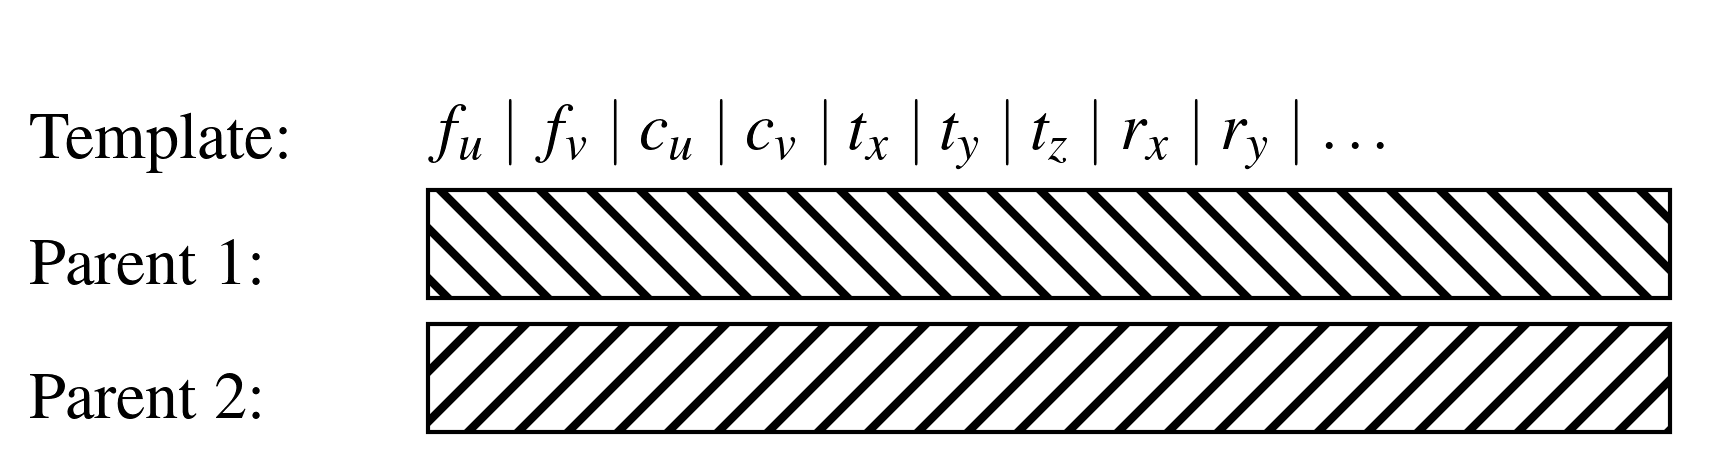

In [3]:
def general_template() -> plt.Figure:
    figure = plt.figure(figsize=(3.50,0.9)) #
    ax = figure.add_subplot()
    ax.add_patch(patches.Rectangle((0.0, 0.0), 1.0, 0.4, hatch="////", fill=False, lw=0.5))
    ax.add_patch(patches.Rectangle((0.0, 0.5), 1.0, 0.4, hatch="\\\\\\\\", fill=False, lw=0.5))
    ax.text(-0.00, 1.05, "$f_u \mid f_v \mid c_u \mid c_v \mid t_x \mid t_y \mid t_z \mid r_x \mid r_y \mid \dots$")

    ax.set_xlim([-0.30, 1.01])
    ax.set_ylim([-0.02, 1])

    ax.text(-0.32, 1.02, "Template: ")
    ax.text(-0.32, 0.55, "Parent 1: ")
    ax.text(-0.32, 0.05, "Parent 2: ")
    ax.set_xlim([-0.30, 1.01])
    ax.set_ylim([-0.02, 1.50])

    ax.axis("off")
    return figure
_ = general_template()

In [4]:
def npoint_crossover(splits: list[float], spacing:float = 0.04) -> plt.Figure:
    figure = plt.figure(figsize=(3.50,0.6))
    ax = figure.add_subplot()
    last_split = 0.0
    for idx, split in enumerate(splits):
        is_even = idx % 2 == 0
        o1_hatch = "////" if is_even else "\\\\\\\\"
        o2_hatch = "////" if not is_even else "\\\\\\\\"
        ax.add_patch(patches.Rectangle((last_split, 0.5), (split-last_split)-spacing, 0.4, hatch=o1_hatch, fill=False, lw=0.5))
        ax.add_patch(patches.Rectangle((last_split, 0.0), (split-last_split)-spacing, 0.4, hatch=o2_hatch, fill=False, lw=0.5))
        last_split = split
    is_even = len(splits) % 2 == 0
    o1_hatch = "////" if is_even else "\\\\\\\\"
    o2_hatch = "////" if not is_even else "\\\\\\\\"
    ax.add_patch(patches.Rectangle((last_split, 0.5), (1-last_split), 0.4, hatch=o1_hatch, fill=False, lw=0.5))
    ax.add_patch(patches.Rectangle((last_split, 0.0), (1-last_split), 0.4, hatch=o2_hatch, fill=False, lw=0.5))

    ax.text(-0.32, 0.55, "Offspring 1: ")
    ax.text(-0.32, 0.05, "Offspring 2: ")
    ax.set_xlim([-0.30, 1.01])
    ax.set_ylim([-0.02, 1.00])
    ax.axis("off")
    return figure


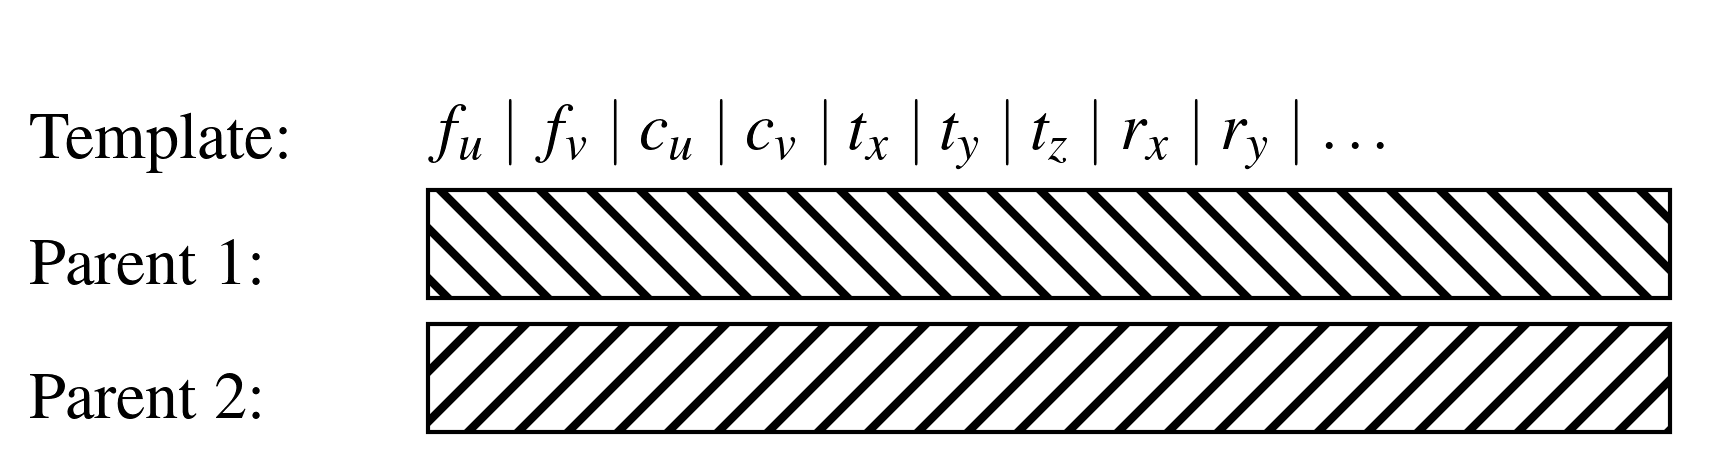

In [5]:
generaltemplate = general_template()
save_figure(generaltemplate, f"{OUTPUT_FOLDER}/templatecrossover.eps")

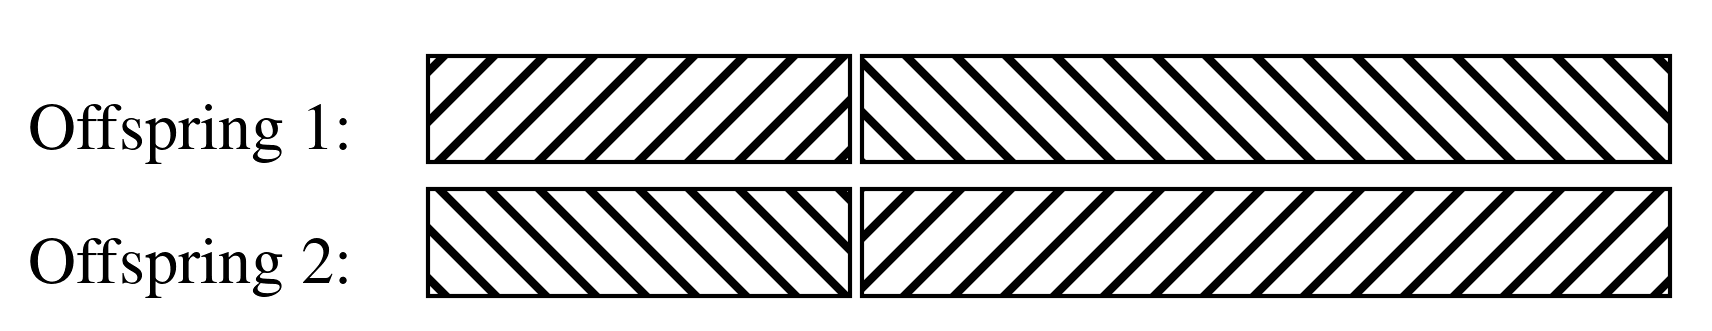

In [6]:
singlepointcrossover = npoint_crossover([0.35], spacing=0.01)
save_figure(singlepointcrossover, f"{OUTPUT_FOLDER}/singlepointcrossover.eps")

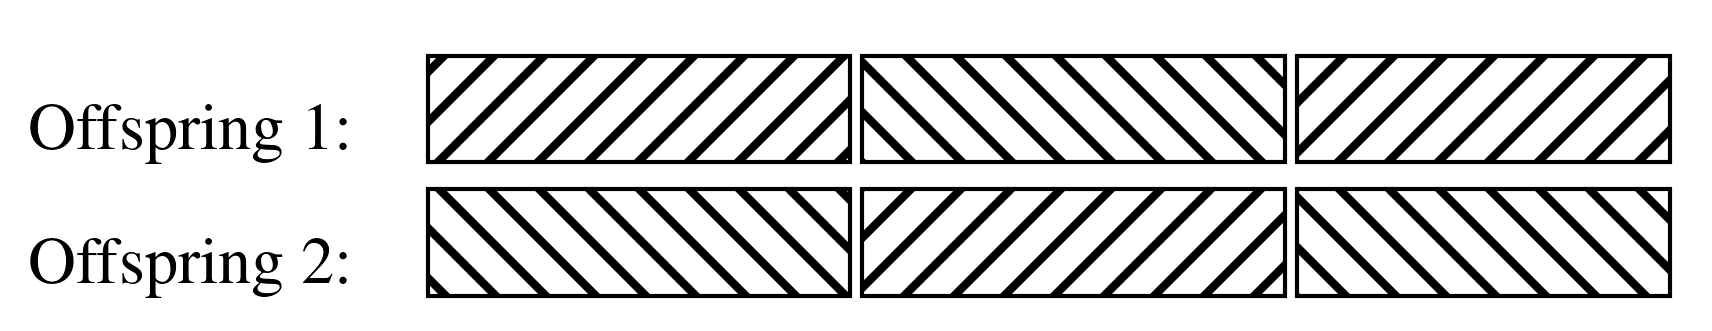

In [7]:
twopointcrossover = npoint_crossover([0.35, 0.7], spacing=0.01)
save_figure(twopointcrossover, f"{OUTPUT_FOLDER}/twopointcrossover.eps")


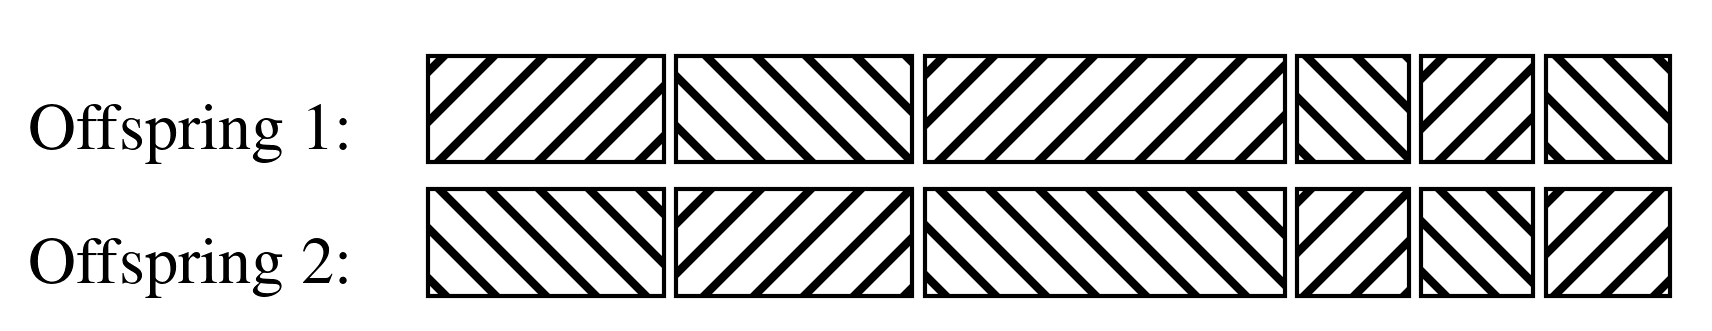

In [8]:
uniformcrossover = npoint_crossover([0.2, 0.4, 0.7, 0.8, 0.9], spacing=0.01)
save_figure(uniformcrossover, f"{OUTPUT_FOLDER}/uniformcrossover.eps")